In [2]:
########################################################### 0

input_file = "Recording.wav"

# user defined
output_vad_file = "frame_vad_outputs/manifest_vad_output.json"
manifest_name = 'manifest.json'
vad_folder = "VAD_wavs"

from pathlib import Path
input_file_path = Path(input_file)
prep_file = str(f"{input_file_path.stem}_preprocessed{input_file_path.suffix}")

Конвертация вавок в нужный формат - 16000 Гц sample rate, Mono channel. На выходе имеем преобразованные вавки

In [3]:
########################################################### 1
import ffmpeg

audio_input = ffmpeg.input(input_file)
audio_output = ffmpeg.output(audio_input, prep_file, format='wav', ar=16000, ac=1)
ffmpeg.run(audio_output)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

(None, None)

Создание манифеста, по которому работает ВАД. На выходе имеем файл манифеста:

In [4]:
########################################################### 2
manifest = {
    "audio_filepath": prep_file,
    "offset": 0,
    "duration": None
}

import json
with open(manifest_name, "w+") as user_file:
    json.dump(manifest, user_file)

Используя файл манифесра, делаем VAD. Получаем файл vad_out.json:

In [5]:
########################################################### 3
from src.nemo.frame_vad_infer import main as vad
from hydra import compose, initialize

initialize(config_path=".", job_name="test_app")
cfg = compose(config_name="frame_vad_infer_postprocess.yaml", return_hydra_config=True, overrides=[f"input_manifest={manifest_name}", f"dataset={manifest_name}"])
vad(cfg)

[NeMo W 2023-10-03 15:31:07 nemo_logging:349] /tmp/ipykernel_25596/161577061.py:5: UserWarning: 
    The version_base parameter is not specified.
    Please specify a compatability version level, or None.
    Will assume defaults for version 1.1
      initialize(config_path=".", job_name="test_app")
    


[NeMo I 2023-10-03 15:31:07 frame_vad_infer:76] Loading manifest file manifest.json
[NeMo I 2023-10-03 15:31:07 frame_vad_infer:82] Split long audio file to avoid CUDA memory issue


splitting manifest:   0%|          | 0/1 [00:00<?, ?it/s]

Визуализируем это дело

[NeMo I 2023-10-03 02:19:18 cloud:58] Found existing object /home/imeshcheryakov/.cache/torch/NeMo/NeMo_1.20.0/stt_enes_contextnet_large/bab2e1126d9c3eca50f26e03d9e8eb3b/stt_enes_contextnet_large.nemo.
[NeMo I 2023-10-03 02:19:18 cloud:64] Re-using file from: /home/imeshcheryakov/.cache/torch/NeMo/NeMo_1.20.0/stt_enes_contextnet_large/bab2e1126d9c3eca50f26e03d9e8eb3b/stt_enes_contextnet_large.nemo
[NeMo I 2023-10-03 02:19:18 common:913] Instantiating model from pre-trained checkpoint
[NeMo I 2023-10-03 02:19:23 mixins:194] _setup_tokenizer: detected an aggregate tokenizer
[NeMo I 2023-10-03 02:19:23 mixins:322] Tokenizer SentencePieceTokenizer initialized with 1024 tokens
[NeMo I 2023-10-03 02:19:23 mixins:322] Tokenizer SentencePieceTokenizer initialized with 1024 tokens
[NeMo I 2023-10-03 02:19:23 aggregate_tokenizer:72] Aggregate vocab size: 2048


[NeMo W 2023-10-03 02:19:25 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /datatrain/tarred_audio_manifest.json
    sample_rate: 16000
    batch_size: 16
    trim_silence: false
    max_duration: 20
    shuffle: true
    is_tarred: true
    tarred_audio_filepaths: /datatrain/audio__OP_0..511_CL_.tar
    tarred_shard_strategy: scatter
    use_start_end_token: false
    num_workers: 8
    pin_memory: true
    
[NeMo W 2023-10-03 02:19:25 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath:
    - /datadev/fisher/dev_fisher_mounted_files_manifest_es.json
    - /datadev/mcv7/dev_mcv7_mounted_files_ma

[NeMo I 2023-10-03 02:19:25 features:289] PADDING: 16


[NeMo W 2023-10-03 02:19:31 nemo_logging:349] /home/imeshcheryakov/anaconda3/envs/kvint/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
      warnings.warn("dropout option adds dropout after all but last "
    


[NeMo I 2023-10-03 02:19:32 rnnt_models:211] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.001}
[NeMo I 2023-10-03 02:19:33 save_restore_connector:249] Model EncDecRNNTBPEModel was successfully restored from /home/imeshcheryakov/.cache/torch/NeMo/NeMo_1.20.0/stt_enes_contextnet_large/bab2e1126d9c3eca50f26e03d9e8eb3b/stt_enes_contextnet_large.nemo.


Transcribing:   0%|          | 0/2 [00:00<?, ?it/s]

[' this is the death aldure', ' one', ' do', ' free', " i'm the best candidate you've ever seen"]


<Figure size 1000x1000 with 0 Axes>

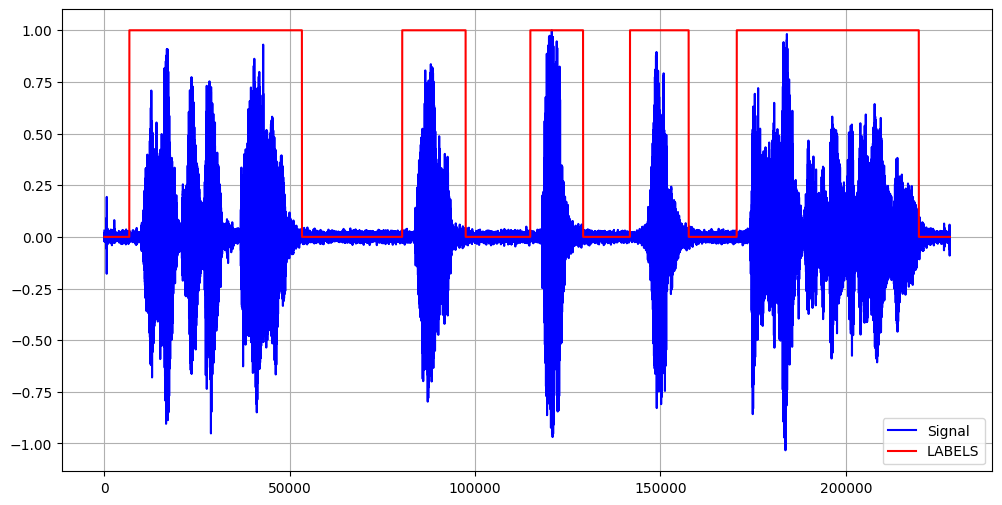

In [ ]:
########################################################### 4
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import os
import json

with open(output_vad_file, "r") as user_file:
    vad_file = json.load(user_file)

manifest = []
with open(vad_file['rttm_filepath']) as f:
    for line in f:
        manifest.append(line)

Path(vad_folder).exists()

os.makedirs(vad_folder, exist_ok=True)

data, sr = librosa.load(prep_file, sr=16000)

labels = np.zeros(len(data))

filelist = []
for idx, interval in enumerate(manifest):
    file = f'{vad_folder}/wav_{idx}.wav'
    start = float(interval.split(" ")[3])
    end = float(interval.split(" ")[3]) + float(interval.split(" ")[4])
    labels[int(sr * start) : int(sr * end)] = [1] * (int(sr * end) - int(sr * start))
    sf.write(file, data[int(sr * start) : int(sr * end)], sr, 'PCM_24')
    filelist.append(file)


import nemo.collections.asr as nemo_asr
asr_model = nemo_asr.models.EncDecRNNTBPEModel.from_pretrained(model_name="stt_enes_contextnet_large")
transcripts = asr_model.transcribe(paths2audio_files=filelist)[0]

plt.figure(figsize=(10, 10))
plt.subplots(1, 1, figsize=(12, 6))
plt.plot(data / max(data), label="Signal", color="b")
plt.plot(labels, label="LABELS", color='r')
plt.legend()
plt.grid()

print(transcripts)

os.rmdir(Path(output_vad_file).parent)
os.rmdir(vad_folder)